# UBER DATA

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline

## Importing Data

In [32]:
uber = pd.read_csv('uber-raw-data-janjune-15_sample.csv')
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [33]:
uber.shape

(100000, 4)

## Data Cleaning

1. Duplicates

In [34]:
uber.duplicated().sum()

np.int64(54)

In [35]:
uber.drop_duplicates(inplace= True)

In [36]:
uber.duplicated().sum()

np.int64(0)

In [37]:
uber.shape

(99946, 4)

2. Handling Missing Values

In [38]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Dispatching_base_num  99946 non-null  object
 1   Pickup_date           99946 non-null  object
 2   Affiliated_base_num   98830 non-null  object
 3   locationID            99946 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


In [39]:
uber.isna().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [40]:
[feature for feature in uber.columns if uber[feature].isnull().sum() > 0]

['Affiliated_base_num']

Filling the null values with the mode of the column as they could belong to the most common base and mathematically it maintains consistency.....

In [41]:
uber['Affiliated_base_num'].fillna(uber['Affiliated_base_num'].mode()[0], inplace= True)

C:\Users\Avinash\AppData\Local\Temp\ipykernel_17688\2522839494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber['Affiliated_base_num'].fillna(uber['Affiliated_base_num'].mode()[0], inplace= True)


In [42]:
uber.isna().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

3. Checking the Datatypes

In [43]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [45]:
uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [46]:
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'])

In [47]:
uber.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## Analysis

In [48]:
Preferred_Color = '#89332a'

Q1. Which month have max Uber Pickups?

In [49]:
uber['month'] = uber['Pickup_date'].dt.month_name()

In [50]:
uber_max_month = uber.groupby('month').size().reset_index(name= 'Pickup_Count').sort_values('Pickup_Count')
uber_max_month

,month,Pickup_Count
2,January,13819
1,February,15896
4,March,15969
0,April,15982
5,May,18660
3,June,19620


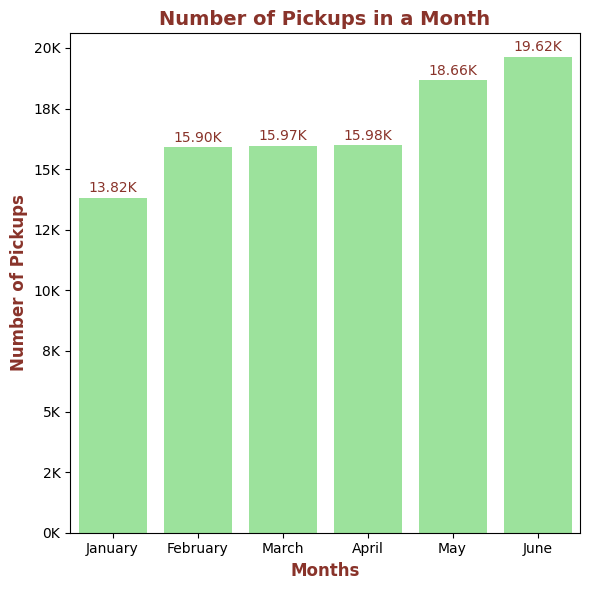

In [51]:
plt.figure(figsize=(6,6))
myplot = sns.barplot(data= uber_max_month, x= 'month', y= 'Pickup_Count',
            color= "lightgreen")

for bar in myplot.containers:
    myplot.bar_label(bar,
                     labels= [f'{(v/1000):0.2f}K' for v in bar.datavalues],
                     padding= 2,
                     color = Preferred_Color)
    
myplot.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f'{x/1000:0.0f}K'))
plt.title("Number of Pickups in a Month",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 14,
                     'color': Preferred_Color})
plt.xlabel("Months",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 12,
                     'color': Preferred_Color})
plt.ylabel("Number of Pickups",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 12,
                     'color': Preferred_Color})

plt.tight_layout()
plt.show()

Insights:
    Clearly June has the maximum number of Pickups

Q2. Which month have max Uber Pickups spread over weekdays?

In [53]:
uber['Weekday'] = uber['Pickup_date'].dt.day_name()
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,Weekday
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday


In [58]:
uber['Hours'] = uber['Pickup_date'].dt.hour
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,Weekday,Hours
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,21
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,19
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,20
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,17
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,7


In [59]:
uber['Day'] = uber['Pickup_date'].dt.day
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,Weekday,Hours,Day
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,21,2
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,19,20
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,20,19
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,17,10
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,7,23


In [61]:
uber = uber.rename(columns= {'month':"Month"})
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Weekday,Hours,Day
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,21,2
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,19,20
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,20,19
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,17,10
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,7,23


In [66]:
pivot_uber = pd.crosstab(index = uber['Weekday'], columns= uber['Month'])
pivot_uber

Month,April,February,January,June,March,May
Weekday,,,,,,
Friday,2365,2655,2508,2793,2465,3262
Monday,1833,1970,1353,2848,2115,1865
Saturday,2508,2550,2745,3037,2522,3519
Sunday,2052,2183,1651,2485,2379,2944
Thursday,2823,2396,2378,2767,2093,2627
Tuesday,1880,2129,1444,3187,2388,2115
Wednesday,2521,2013,1740,2503,2007,2328


In [67]:
pivot_uber.sort_index(key= lambda x: x.map(lambda day: uber.loc[uber['Weekday'] == day, 'Pickup_date'].dt.day_of_week.iloc[0]))

Month,April,February,January,June,March,May
Weekday,,,,,,
Monday,1833,1970,1353,2848,2115,1865
Tuesday,1880,2129,1444,3187,2388,2115
Wednesday,2521,2013,1740,2503,2007,2328
Thursday,2823,2396,2378,2767,2093,2627
Friday,2365,2655,2508,2793,2465,3262
Saturday,2508,2550,2745,3037,2522,3519
Sunday,2052,2183,1651,2485,2379,2944


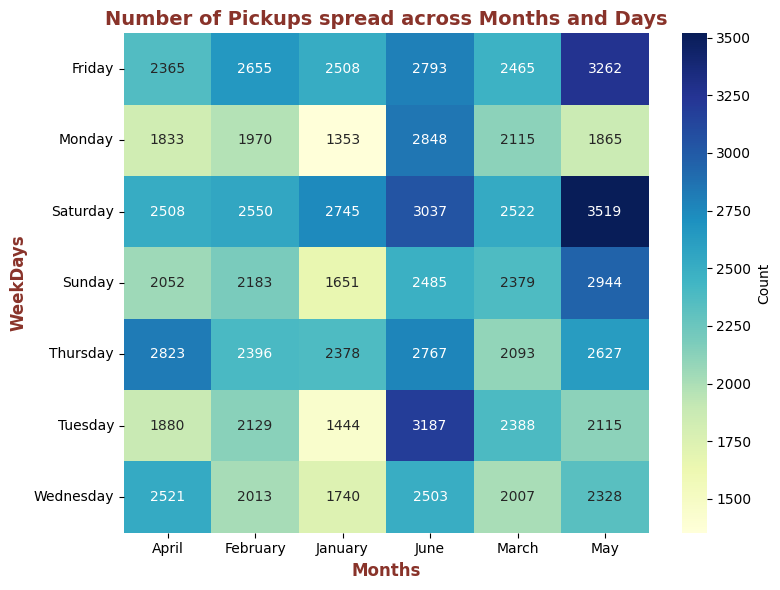

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_uber, annot=True, cmap="YlGnBu", fmt="g", cbar_kws={'label': 'Count'})

plt.title("Number of Pickups spread across Months and Days",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})
plt.xlabel("Months",
          fontdict= {'fontsize': 12,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})
plt.ylabel("WeekDays",
          fontdict= {'fontsize': 12,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})

plt.tight_layout()
plt.show()

<Axes: xlabel='Month'>

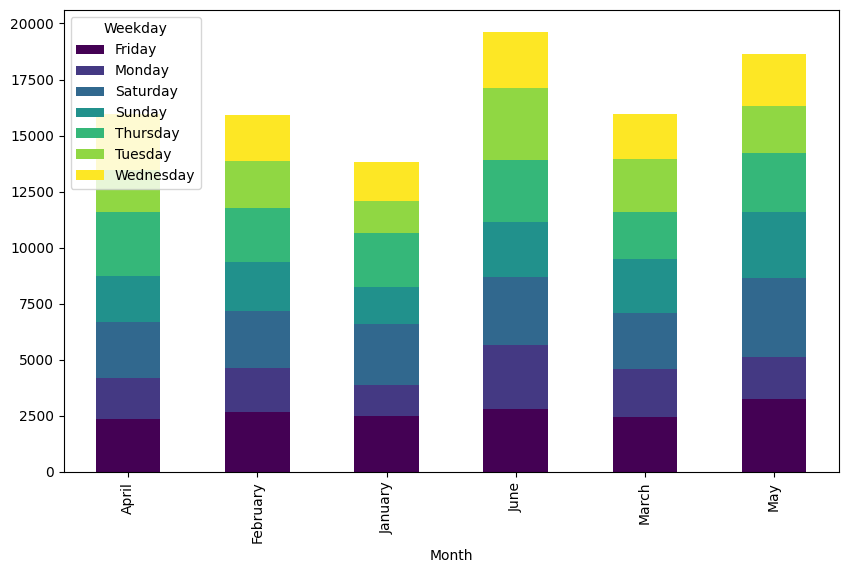

In [74]:
pivot_uber_transposed = pivot_uber.T

# Plot the stacked bar chart
pivot_uber_transposed.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")


<Axes: xlabel='Month'>

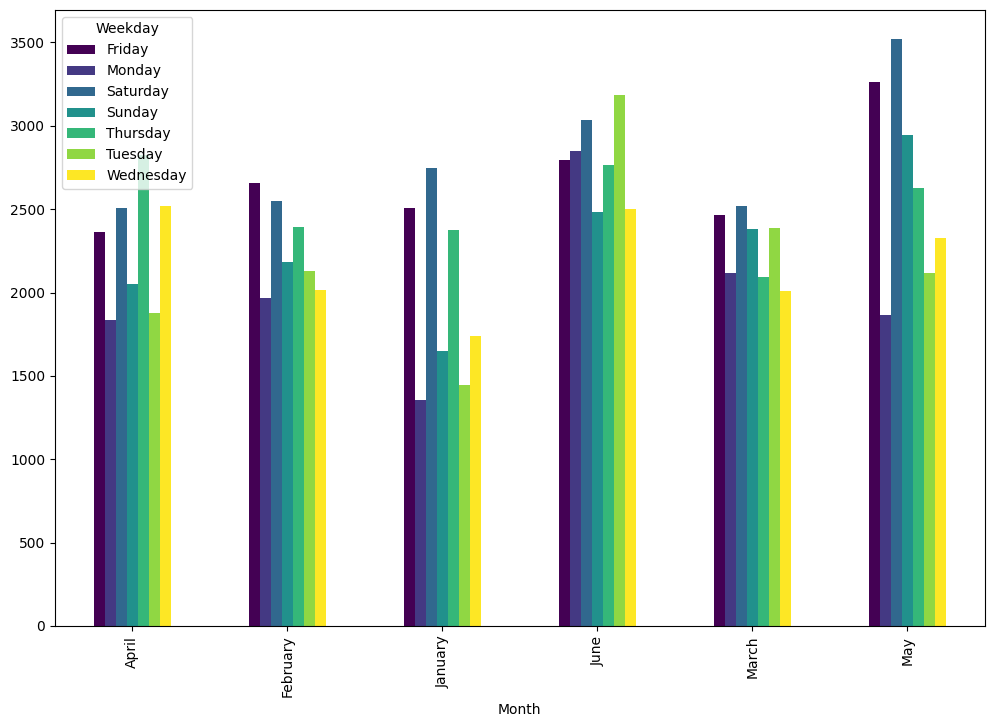

In [87]:
pivot_uber_transposed.plot(kind= 'bar', figsize=(12, 8), colormap="viridis")

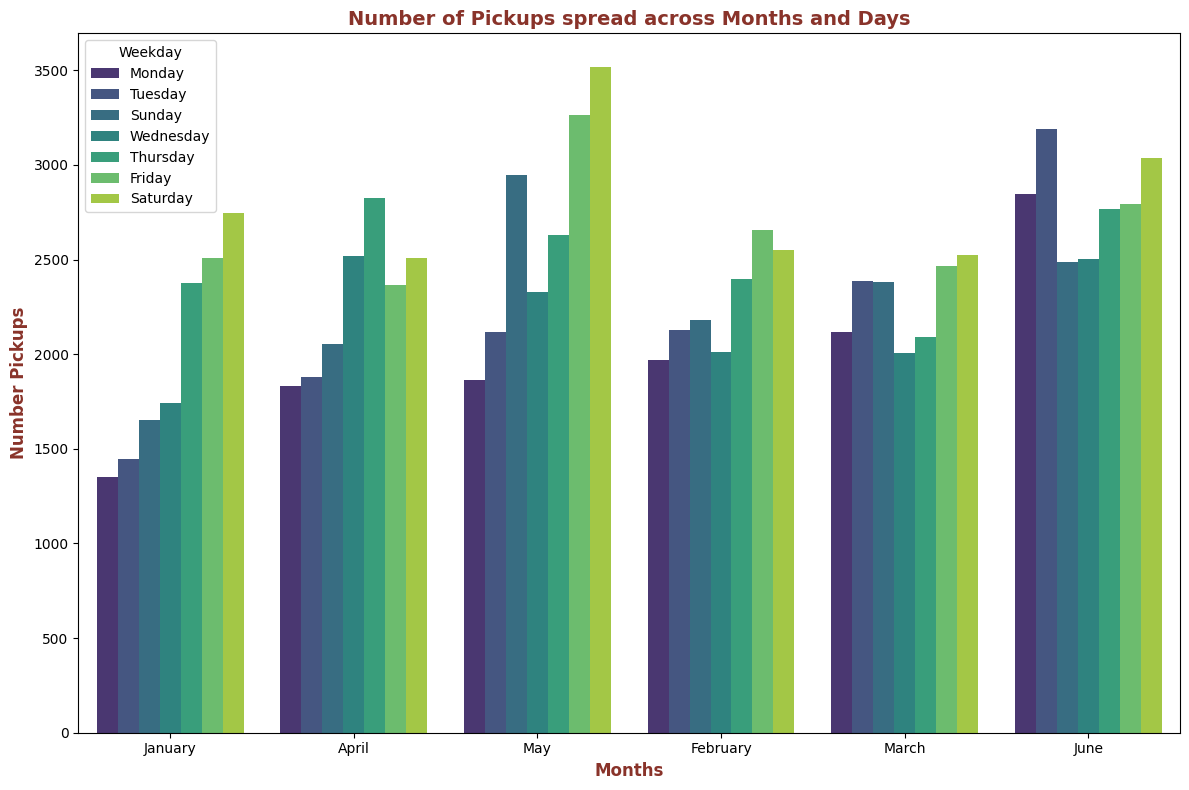

In [86]:
uber_test = uber.groupby(['Month','Weekday']).size().reset_index(name= 'Pickup_Count').sort_values('Pickup_Count')

plt.figure(figsize=(12,8))
sns.barplot(data= uber_test, x= 'Month', y= 'Pickup_Count', hue= 'Weekday', palette= 'viridis')

plt.title("Number of Pickups spread across Months and Days",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})
plt.xlabel("Months",
          fontdict= {'fontsize': 12,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})
plt.ylabel("Number Pickups",
          fontdict= {'fontsize': 12,
                     'fontweight' : 'bold',
                     'color': Preferred_Color})

plt.tight_layout()
plt.show()

Insights:
    Interesting when we sub-divide the plot into Weekday, "Saturdays of May" recorded the highest number of Pickups.
    But on Whole it the "June" which recorded highest number of Pickups